In [19]:
# average nota pt real, uman, tehnic, servicii si ce mai e
# promovabilitate pe judete / rural vs urban / sexe / zi vs seral vs frecventa redusa

In [17]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

In [2]:
raw_rezultate = pd.read_excel('2019-08-06-date-deschise-bac-2019-i.xlsx')
raw_licee = pd.read_excel('coduri_sirues.xlsx')

/Users/petru-liviubouruc/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
rezultate = raw_rezultate[raw_rezultate['Unitate (SIRUES)'].notnull()]
licee = raw_licee[raw_licee['Cod SIRUES'].notnull()]

In [4]:
rezultate['Unitate (SIRUES)'] = rezultate['Unitate (SIRUES)'].astype(int)
licee['Cod SIRUES'] = licee['Cod SIRUES'].astype(int)

/var/folders/bb/sgc20cyj6z1_05b8x3_hjb540000gn/T/ipykernel_46955/3402016723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rezultate['Unitate (SIRUES)'] = rezultate['Unitate (SIRUES)'].astype(int)
/var/folders/bb/sgc20cyj6z1_05b8x3_hjb540000gn/T/ipykernel_46955/3402016723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licee['Cod SIRUES'] = licee['Cod SIRUES'].astype(int)


In [5]:
stats_judete = {}
for _, value in enumerate(licee['Judeţ'].unique()):
    stats_judete[value] = [0,0,0] # [nepromovati, promovati, promovabilitate]

In [6]:
for _, elev in rezultate.iterrows():
    cod_sirues = elev['Unitate (SIRUES)']
    if cod_sirues in licee['Cod SIRUES'].values:
        liceu = licee.loc[licee['Cod SIRUES'] == cod_sirues]
        if elev['STATUS'] == 'Promovat':
            stats_judete[liceu['Judeţ'].values[0]][1] += 1
            stats_judete[liceu['Judeţ'].values[0]][2] += elev['Medie']
        if elev['STATUS'] == 'Nepromovat':
            stats_judete[liceu['Judeţ'].values[0]][0] += 1
    

In [7]:
stats_judete['Ilfov'] = stats_judete['Bucuresti'] # Ilfov era [0,0,0]
stats_judete = dict(sorted(stats_judete.items(), key=lambda x: unidecode(x[0])))

promovabilitate = []
for judet in stats_judete:
    stats_judete[judet][2] = stats_judete[judet][1] / (stats_judete[judet][0]+stats_judete[judet][1])
    promovabilitate.append(stats_judete[judet][2])
print(promovabilitate)
print(stats_judete)

[0.714524905818334, 0.6476339460305045, 0.7196691176470589, 0.7809110629067245, 0.6799387442572741, 0.6763527054108216, 0.7275054864667154, 0.763755980861244, 0.7491716368455931, 0.7470283450167632, 0.7451201201201201, 0.5838827838827839, 0.6263219741480611, 0.826151560178306, 0.6183282980866063, 0.6073298429319371, 0.609172482552343, 0.6596596596596597, 0.7455904334828102, 0.51440329218107, 0.6268896751366999, 0.5305164319248826, 0.6688693098384728, 0.6600496277915633, 0.777033681307859, 0.7470283450167632, 0.6426209798617373, 0.5729166666666666, 0.6240853658536586, 0.6973277074542897, 0.6817303978370027, 0.7342225761497113, 0.6189078097475044, 0.680161943319838, 0.7647565704437742, 0.6978181116045569, 0.6084507042253521, 0.6615146831530139, 0.6450511945392492, 0.6701836654943337, 0.6721128852580764, 0.6975425330812854]
{'Alba': [682, 1707, 0.714524905818334], 'Arad': [901, 1656, 0.6476339460305045], 'Arges': [1220, 3132, 0.7196691176470589], 'Bacau': [808, 2880, 0.7809110629067245], 

<Axes: >

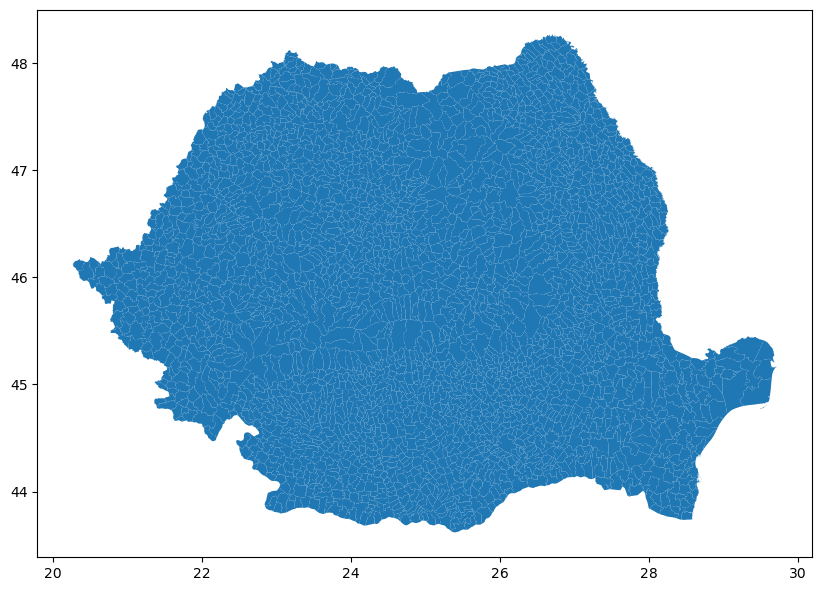

In [8]:
romania = gpd.read_file("./gadm36_ROU.gpkg")
romania.plot(figsize=(10, 10))

In [9]:
romania['NAME_1_normalized'] = romania['NAME_1'].apply(unidecode)
sorted_romania = romania.sort_values(by='NAME_1_normalized')

<Axes: >

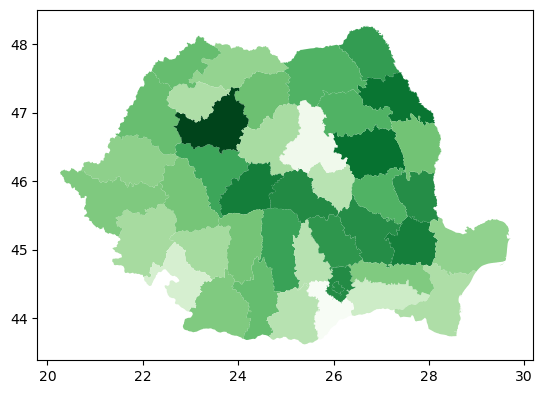

In [10]:
romania_by_county = romania[['NAME_1_normalized', 'geometry']].dissolve(by="NAME_1_normalized", aggfunc='sum')
romania_by_county['numbers'] = promovabilitate #np.random.randint(10, 1000, size=(romania_by_county.shape[0]))
_map = romania_by_county.plot(column='numbers', cmap='Greens')
_map

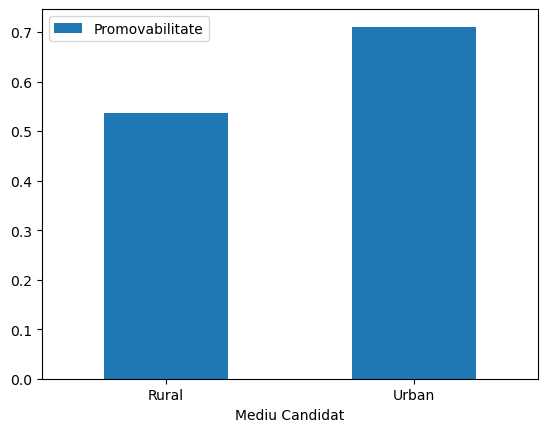

In [11]:
rural = [0, 0]
urban = [0, 0]
for _, elev in rezultate.iterrows():
    if elev['Mediu candidat'] == 'RURAL':
        if elev['STATUS'] == 'Promovat':
            rural[0] += 1
        rural[1] += 1
    elif elev['Mediu candidat'] == 'URBAN':
        if elev['STATUS'] == 'Promovat':
            urban[0] += 1
        urban[1] += 1

mediu_df = pd.DataFrame({'Mediu Candidat':['Rural', 'Urban'], 'Promovabilitate':[rural[0]/rural[1], urban[0]/urban[1]]})
ax = mediu_df.plot.bar(x='Mediu Candidat', y='Promovabilitate', rot=0)

{'Uman': [26896, 32838], 'Real': [36585, 44812], 'Servicii': [11740, 21849], 'Tehnic': [3379, 16256], 'Resurse naturale și protecția mediului': [1799, 7097], 'Educație fizică și sport': [2098, 4458], 'Teologic': [1473, 2190], 'Artistic': [2685, 3752], 'Pedagogic': [2080, 2328], 'Militar': [323, 325]}


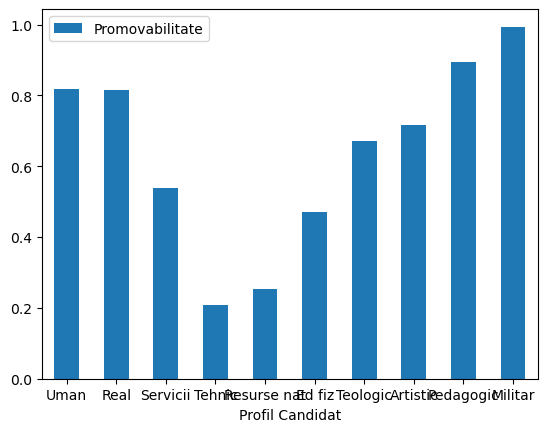

In [12]:
profile = rezultate['Profil'].unique()
stats_profile = {value: [0, 0] for value in profile}

for _, elev in rezultate.iterrows():
    if elev['STATUS'] == 'Promovat':
        stats_profile[elev['Profil']][0] += 1
    stats_profile[elev['Profil']][1] += 1

print(stats_profile)

profil_df = pd.DataFrame({'Profil Candidat':['Uman', 'Real', 'Servicii', 'Tehnic', 'Resurse nat', 'Ed fiz', 'Teologic', 'Artistic', 'Pedagogic', 'Militar'], 'Promovabilitate':[stats_profile['Uman'][0]/stats_profile['Uman'][1], stats_profile['Real'][0]/stats_profile['Real'][1], stats_profile['Servicii'][0]/stats_profile['Servicii'][1], stats_profile['Tehnic'][0]/stats_profile['Tehnic'][1], stats_profile['Resurse naturale și protecția mediului'][0]/stats_profile['Resurse naturale și protecția mediului'][1], stats_profile['Educație fizică și sport'][0]/stats_profile['Educație fizică și sport'][1], stats_profile['Teologic'][0]/stats_profile['Teologic'][1], stats_profile['Artistic'][0]/stats_profile['Artistic'][1], stats_profile['Pedagogic'][0]/stats_profile['Pedagogic'][1], stats_profile['Militar'][0]/stats_profile['Militar'][1]]})
ax = profil_df.plot.bar(x='Profil Candidat', y='Promovabilitate', rot=0)

{'Zi': [88620, 132905], 'Frecvență redusă': [287, 1552], 'Seral': [151, 1448]}


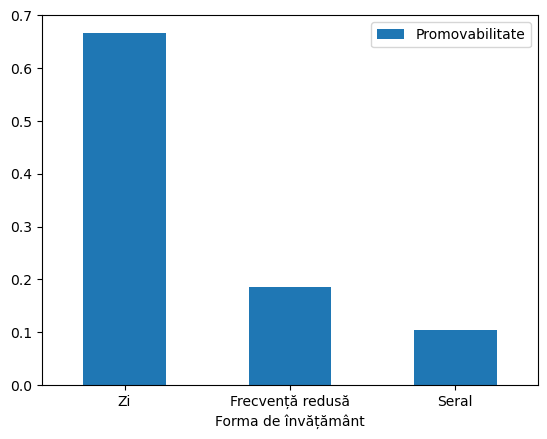

In [13]:
fi = rezultate['Forma de învățământ'].unique()
stats_fi = {value: [0, 0] for value in fi}

for _, elev in rezultate.iterrows():
    if elev['STATUS'] == 'Promovat':
        stats_fi[elev['Forma de învățământ']][0] += 1
    stats_fi[elev['Forma de învățământ']][1] += 1

print(stats_fi)

fi_df = pd.DataFrame({'Forma de învățământ':['Zi', 'Frecvență redusă', 'Seral'], 'Promovabilitate':[stats_fi['Zi'][0]/stats_fi['Zi'][1], stats_fi['Frecvență redusă'][0]/stats_fi['Frecvență redusă'][1], stats_fi['Seral'][0]/stats_fi['Seral'][1]]})
ax = fi_df.plot.bar(x='Forma de învățământ', y='Promovabilitate', rot=0)

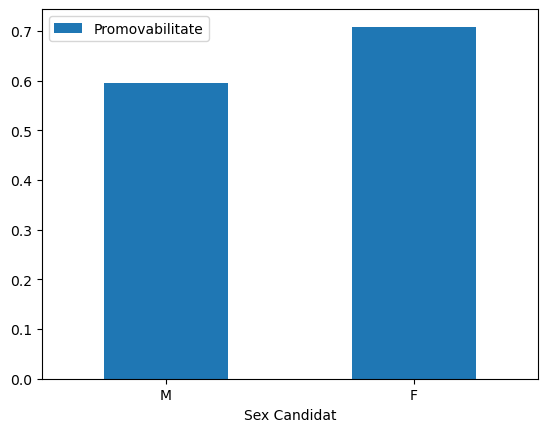

In [14]:
M = [0, 0]
F = [0, 0]
for _, elev in rezultate.iterrows():
    if elev['Sex'] == 'M':
        if elev['STATUS'] == 'Promovat':
            M[0] += 1
        M[1] += 1
    elif elev['Sex'] == 'F':
        if elev['STATUS'] == 'Promovat':
            F[0] += 1
        F[1] += 1

sexe_df = pd.DataFrame({'Sex Candidat':['M', 'F'], 'Promovabilitate':[M[0]/M[1], F[0]/F[1]]})
ax = sexe_df.plot.bar(x='Sex Candidat', y='Promovabilitate', rot=0)

In [15]:
ppp_df = pd.read_csv('ro_counties_gdp.csv')
ppp_df.head()

,Judet,PPP
0,Alba,7045
1,Arad,9188
2,Argeș,11436
3,Bacău,8391
4,Bihor,9759


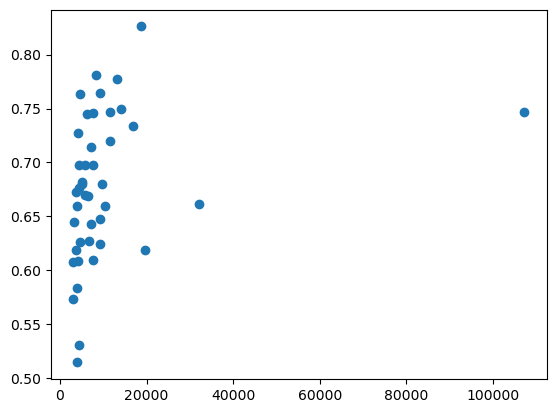

In [18]:
np_ppp = ppp_df['PPP'].to_numpy()
np_promp = np.array(promovabilitate)
plt.scatter(np_ppp, np_promp)

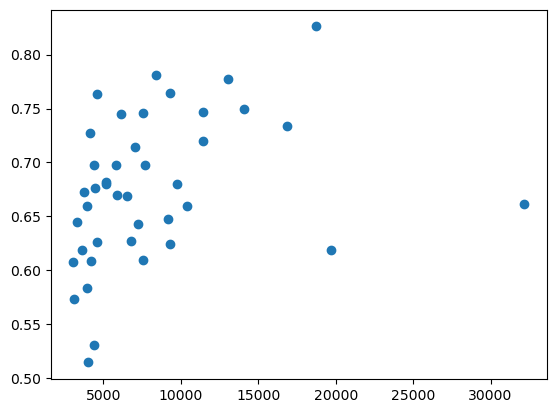

In [19]:
idx = [9]
new_np_ppp = np.delete(np_ppp, idx)
new_np_promp = np.delete(np_promp, idx)
plt.scatter(new_np_ppp, new_np_promp)